<a href="https://colab.research.google.com/github/vbloise3/Data_Science/blob/master/WorkingWithData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

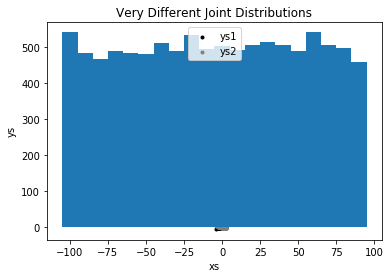

0.9010493686379609
-0.8920981526880033


  1%|          | 1/100 [00:00<00:16,  5.88it/s]

closing price: 53.015



100%|██████████| 100/100 [00:13<00:00,  8.01it/s]


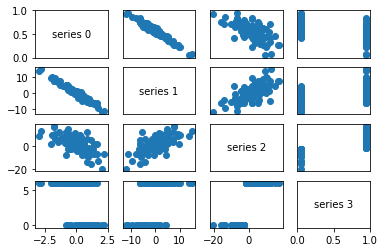

In [12]:
!pip install tqdm
from typing import List , Dict 
from collections import Counter 
import math 
import matplotlib.pyplot as plt 
import random 
from typing import Callable

Vector = List[float]
Matrix = List[List[float]]

def make_matrix(num_rows: int,
                num_cols: int,
                entry_fn: Callable[[int, int], float]) -> Matrix:
    """
    Returns a num_rows x num_cols matrix
    whose (i,j)-th entry is entry_fn(i, j)
    """
    return [[entry_fn(i, j)             # given i, create a list
             for j in range(num_cols)]  #   [entry_fn(i, 0), ... ]
            for i in range(num_rows)]   # create one list for each i

def covariance(xs: List[float], ys: List[float]) -> float:
    assert len(xs) == len(ys), "xs and ys must have same number of elements"

    return dot(de_mean(xs), de_mean(ys)) / (len(xs) - 1)

def dot(v: Vector, w: Vector) -> float:
    """Computes v_1 * w_1 + ... + v_n * w_n"""
    assert len(v) == len(w), "vectors must be same length"

    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v: Vector) -> float:
    """Returns v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

def mean(xs: List[float]) -> float:
    return sum(xs) / len(xs)

def de_mean(xs: List[float]) -> List[float]:
    """Translate xs by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(xs)
    return [x - x_bar for x in xs]

def variance(xs: List[float]) -> float:
    """Almost the average squared deviation from the mean"""
    assert len(xs) >= 2, "variance requires at least two elements"

    n = len(xs)
    deviations = de_mean(xs)
    return sum_of_squares(deviations) / (n - 1)

def standard_deviation(xs: List[float]) -> float:
    """The standard deviation is the square root of the variance"""
    return math.sqrt(variance(xs))

def correlation(xs: List[float], ys: List[float]) -> float:
    """Measures how much xs and ys vary in tandem about their means"""
    stdev_x = standard_deviation(xs)
    stdev_y = standard_deviation(ys)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(xs, ys) / stdev_x / stdev_y
    else:
        return 0    # if no variation, correlation is zero

def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

def inverse_normal_cdf(p: float,
                       mu: float = 0,
                       sigma: float = 1,
                       tolerance: float = 0.00001) -> float:
    """Find approximate inverse using binary search"""

    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)

    low_z = -10.0                      # normal_cdf(-10) is (very close to) 0
    hi_z  =  10.0                      # normal_cdf(10)  is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2     # Consider the midpoint
        mid_p = normal_cdf(mid_z)      # and the cdf's value there
        if mid_p < p:
            low_z = mid_z              # Midpoint too low, search above it
        else:
            hi_z = mid_z               # Midpoint too high, search below it

    return mid_z

def bucketize( point: float, bucket_size: float)-> float: 
  """ Floor the point to the next lower multiple of bucket_size""" 
  return bucket_size * math.floor( point / bucket_size)

def make_histogram( points: List[ float], bucket_size: float)-> Dict[ float, int]: 
  """ Buckets the points and counts how many in each bucket""" 
  return Counter( bucketize( point, bucket_size) for point in points)

def plot_histogram( points: List[ float], bucket_size: float, title: str = ""): 
  histogram = make_histogram( points, bucket_size) 
  plt.bar( histogram.keys(), histogram.values(), width = bucket_size) 
  plt.title( title)

def random_normal()-> float: 
  """ Returns a random draw from a standard normal distribution""" 
  return inverse_normal_cdf( random.random())

def correlation_matrix( data: List [ Vector ]) -> Matrix : 
  """ Returns the len(data) x len(data) matrix whose (i, j)-th entry is the correlation between data[i] and data[j] """ 
  def correlation_ij ( i : int , j : int ) -> float: 
    return correlation( data [ i ], data [ j ]) 
  return make_matrix ( len ( data ), len ( data ), correlation_ij ) 

random.seed( 0)
# uniform between-100 and 100 
uniform = [200 * random.random()-100 for _ in range( 10000)]
# normal distribution with mean 0, standard deviation 57 
normal = [57 * inverse_normal_cdf( random.random()) for _ in range( 10000)]

plot_histogram( uniform, 10, "Uniform Histogram")

xs = [random_normal() for _ in range( 1000)] 
ys1 = [ x + random_normal() / 2 for x in xs] 
ys2 = [-x + random_normal() / 2 for x in xs]
plt.scatter( xs, ys1, marker ='.', color ='black', label ='ys1')
plt.scatter( xs, ys2, marker ='.', color ='gray', label ='ys2') 
plt.xlabel('xs') 
plt.ylabel('ys') 
plt.legend( loc = 9) 
plt.title("Very Different Joint Distributions") 
plt.show()

print( correlation( xs, ys1)) # about 0.9 
print( correlation( xs, ys2)) # about-0.9

# Just some random data to show off correlation scatterplots
num_points = 100
def random_row() -> List[float]:
   row = [0.0, 0, 0, 0]
   row[0] = random_normal()
   row[1] = -5 * row[0] + random_normal()
   row[2] = row[0] + row[1] + 5 * random_normal()
   row[3] = 6 if row[2] > -2 else 0
   return row

random.seed(0)
# each row has 4 points, but really we want the columns
corr_rows = [random_row() for _ in range(num_points)]
corr_data = [list(col) for col in zip(*corr_rows)]

# corr_data is a list of four 100-d vectors 
num_vectors = len( corr_data ) 
fig, ax = plt.subplots( num_vectors , num_vectors ) 
for i in range ( num_vectors ): 
  for j in range ( num_vectors ): # Scatter column_j on the x-axis vs. column_i on the y-axis 
      if i != j: ax[ i ][ j ].scatter ( corr_data [ j ], corr_data [ i ]) # unless i == j, in which case show the series name 
      else: ax[ i ][ j ].annotate( "series " + str ( i ), ( 0.5 , 0.5 ), xycoords = 'axes fraction' , ha = "center" , va = "center" ) 
      # Then hide axis labels except left and bottom charts 
      if i < num_vectors - 1: ax [ i ][ j ].xaxis.set_visible( False ) 
      if j > 0: ax [ i ][ j ].yaxis.set_visible ( False ) 
      # Fix the bottom-right and top-left axis labels, which are wrong because 
      # their charts only have text in them 
      #ax[-1][-1].set_xlim(ax[0][-1].get_xlim()) 
      #ax[0][0].set_ylim(ax[0][1].get_ylim()) 
      #plt.show() 

import datetime 
stock_price = { 'closing_price': 102.06, 'date': datetime.date( 2014 , 8 , 29 ), 'symbol' : 'AAPL' } 
from collections import namedtuple 
StockPrice = namedtuple('StockPrice',['symbol', 'date', 'closing_price']) 
price = StockPrice ('MSFT', datetime.date(2018, 12, 14 ), 106.03) 
assert price.symbol == 'MSFT' 
assert price.closing_price == 106.03 

from typing import NamedTuple 
class StockPrice (NamedTuple): 
  symbol: str 
  date: datetime.date 
  closing_price: float 
  def is_high_tech(self) -> bool: 
    """It's a class, so we can add methods too""" 
    return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL'] 
price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03) 
assert price.symbol == 'MSFT' 
assert price.closing_price == 106.03 
assert price.is_high_tech() 

from dataclasses import dataclass 
@dataclass 
class StockPrice2: 
  symbol: str 
  date: datetime.date 
  closing_price: float 
  def is_high_tech(self) -> bool: 
    """It's a class, so we can add methods too""" 
    return self.symbol in['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']
price2 = StockPrice2('MSFT', datetime.date(2018, 12, 14), 106.03) 
assert price2.symbol == 'MSFT' 
assert price2.closing_price == 106.03 
assert price2.is_high_tech() 
# As mentioned, the big difference is that we can modify a dataclass instance’s values: 
# stock split
price2.closing_price /= 2 
print(f"closing price: {price2.closing_price}\n")
assert price2.closing_price == 53.015 

from dateutil.parser import parse
def parse_row( row: List[ str]) -> StockPrice: 
    symbol, date, closing_price = row 
    return StockPrice( symbol = symbol, date = parse( date).date(), closing_price = float( closing_price))

# Now test our function 
stock = parse_row(["MSFT", "2018-12-14", "106.03"]) 
assert stock.symbol == "MSFT"
assert stock.date == datetime.date( 2018, 12, 14) 
assert stock.closing_price == 106.03

import tqdm
for i in tqdm.tqdm( range( 100)): # do something slow 
    _ = [random.random() for _ in range( 1000000)]